<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-colabs/blob/main/Womakers_Code_Aula_Plant%C3%A3o_de_D%C3%BAvidas_Turma_de_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

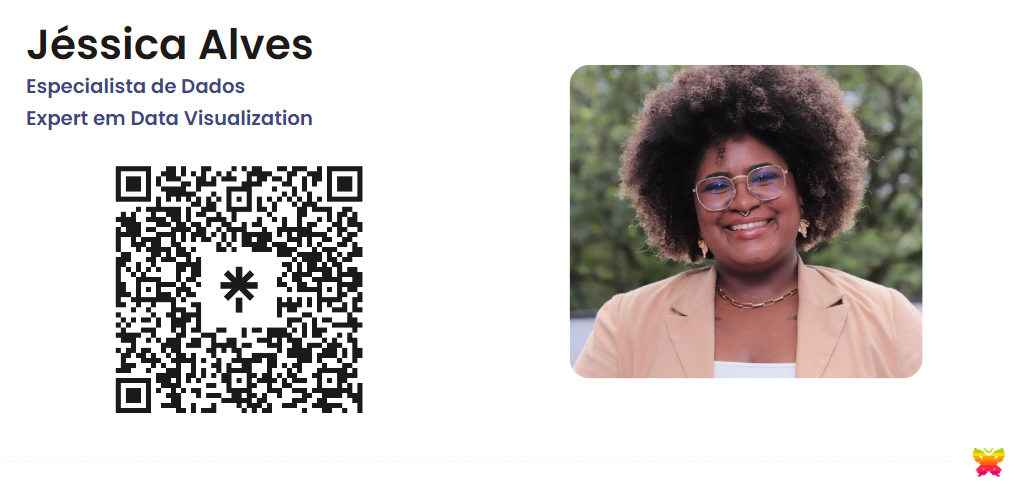

# **Aula 1**

##Probabilidade e Amostragem - Case Michael B. Jordan

A probabilidade esta no nosso dia a dia, inclusive naqueles pensamentos aleatórios e absurdos, vamos testar...

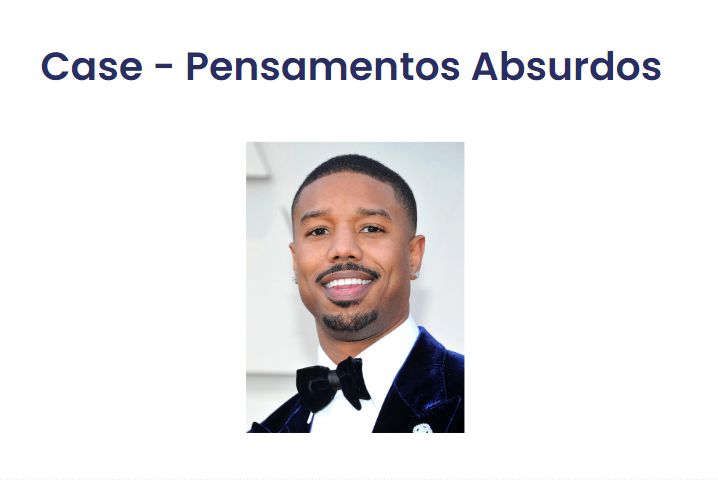

Qual a chance de eu (imagine que você namoraria um homem) namorar com o Michael B. Jordan?

In [ ]:
import numpy as np
import pandas as pd

População

In [ ]:
# Qual o numero de seguidores o MBJ tem em seu Instagram?

total_seguidores = 2500000


Probabilidade Simples - Distribuição Binária
---

In [ ]:
#Qual a probabilidade de uma seguidora ser mulher? (aqui vai no "chute")

np.random.seed(42)
genders = np.random.choice(['Mulher', 'Homem'], size=total_seguidores, p=[0.8, 0.2])

In [ ]:
# Criando um DataFrame para armazenar os dados
seguidores_df = pd.DataFrame({'Gênero': genders})

seguidores_df.head()

,Gênero
0,Mulher
1,Homem
2,Mulher
3,Mulher
4,Mulher


Probabilidade Condicional
---

In [ ]:
#Das mulhers que o seguem quantas gostariam de namorar-lo? 10%?

seguidores_df['Quer_namorar'] = np.where((seguidores_df['Gênero'] == 'Mulher') &
                                         (np.random.rand(total_seguidores) < 0.1), 'Sim', 'Não')

seguidores_df.head()

,Gênero,Quer_namorar
0,Mulher,Não
1,Homem,Não
2,Mulher,Não
3,Mulher,Sim
4,Mulher,Sim


Amostragem
---

In [ ]:
# Filtrando apenas as mulheres que gostariam de namorá-lo
mulheres_interessadas = seguidores_df[(seguidores_df['Gênero'] == 'Mulher') &
                                      (seguidores_df['Quer_namorar'] == 'Sim')]

# Contando o número de mulheres interessadas
numero_mulheres_interessadas = len(mulheres_interessadas)

# Exibindo o número de mulheres interessadas
print(f"Número de mulheres interessadas: {numero_mulheres_interessadas}")


Número de mulheres interessadas: 200103


Probabilidade de Evento Único
---

P(A) = 1/*n*

In [ ]:
(1/total_seguidores)*100

3.9999999999999996e-05

In [ ]:
#0.000003900
#0.00039%

# **Aula 2**


Neste aula, vamos abordar conceitos de probabilidade, amostragem e distribuições aplicados a uma base de dados fictícia de clientes de uma loja de eletrodomésticos. Utilizaremos a biblioteca scipy.stats para cálculos estatísticos e probabilidade, integrando métodos de análise de dados com visualizações em Python.

*Lembrando que dia 19/09 temos entrega dos Projetos que vai utilizar os conceitos abaixo*

**1. Importação das Bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

**2. Criação da Base de Dados Simulada**

In [ ]:
data = {
    'Age': [23, 35, 45, 23, 52, 46, 38, 29, 39, 41, 54, 44, 28, 30, 33, 27, 42, 36, 50, 40],
    'Annual Income': [55000, 46000, 62000, 45000, 80000, 75000, 70000, 48000, 52000, 65000, 85000, 69000, 51000, 49000, 63000, 47000, 73000, 66000, 71000, 68000],
    'Spending Score': [42, 60, 75, 58, 85, 65, 70, 52, 68, 64, 83, 71, 55, 61, 72, 57, 74, 63, 81, 69],
    'Campaign': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)


**3. Probabilidade Complementar**

Qual a chance de selecionar um cliente que não gasta mais de 60 no "Spending Score". Para isso, usamos a distribuição binomial acumulada de scipy.stats

In [ ]:
quant_pessoas = len(df) #Quantos Clientes a gente tem na base
quant_gasto_mais_60 = df[df['Spending Score'] > 60].shape[0] #Qtd de clientes com gasto acima de 60

#stats.binom.cdf(k, n, p)
complementar = stats.binom.cdf(quant_gasto_mais_60, quant_pessoas, 60 / 100)
print(f'A probabilidade complementar é de {round((1 - complementar) * 100, 2)}%.')


A probabilidade complementar é de 12.56%.


**4. Probabilidade Condicional**


Qual a probabilidade de alguém que ganha mais de 60 mil reais também gastar mais de 60 no "Spending Score"?

In [ ]:
dados_renda_60k = df[df['Annual Income'] > 60000] #Filtro para clientes com renda acima de 60k
dados_renda_60k.head()

,Age,Annual Income,Spending Score,Campaign
2,45,62000,75,1
4,52,80000,85,1
5,46,75000,65,0
6,38,70000,70,1
9,41,65000,64,1


In [ ]:
quant_renda_60k

12

In [ ]:
gasto_mais_60_condicional

12

In [ ]:

quant_renda_60k = dados_renda_60k.shape[0] #Quantidade de clientes com renda acima de 60k

gasto_mais_60_condicional = dados_renda_60k[dados_renda_60k['Spending Score'] > 60].shape[0]

probabilidade_condicional = stats.binom.cdf(gasto_mais_60_condicional, quant_renda_60k, 60 / 100)
print(f'Probabilidade condicional: {round(probabilidade_condicional * 100, 2)}%')

Probabilidade condicional: 100.0%


**5. Distribuição Geométrica**


Qual a chance de que, na quinta pessoa que analisamos, encontramos alguém que gasta mais de 70 no "Spending Score"?

In [ ]:
p = len(df[df['Spending Score'] > 70]) / len(df)

prob_quinta_pessoa = stats.geom.pmf(k=5, p=p)
print(f'Probabilidade da quinta pessoa gastar mais de 70: {prob_quinta_pessoa:.2%}')

Probabilidade da quinta pessoa gastar mais de 70: 6.25%


**6. Histograma e Função de Densidade de Probabilidade**

Histograma com intervalos de 10.000 reais para a renda anual, visualizar sua distribuição com uma função de densidade.

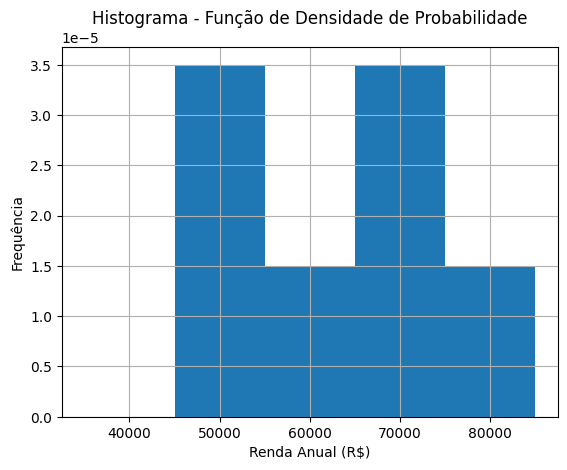

In [ ]:
intervalo = 10000
faixas_renda = np.arange(df['Annual Income'].min() - intervalo, df['Annual Income'].max() + intervalo, intervalo)
contagem_por_faixa, _ = np.histogram(df['Annual Income'], bins=faixas_renda)

plt.hist(df['Annual Income'], bins=faixas_renda, density=True)
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

**Intervalo de 10 min**

**7. Média e Variância**

Calcular o valor central (Média aritmética) e a dispersão dos dados de gasto

In [ ]:
#Usando numpy
media_gasto = np.mean(df['Spending Score'])
variancia_gasto = np.var(df['Spending Score'])

print(f'Média do gasto: {media_gasto}')
print(f'Variância do gasto: {variancia_gasto}')

Média do gasto: 66.25
Variância do gasto: 111.0875


In [ ]:
#calculando desvio padrão

desvio_padrao_gasto = np.std(df['Spending Score'])
print(f'Desvio padrão do gasto: {desvio_padrao_gasto}')

Desvio padrão do gasto: 10.539805501051715


In [ ]:
media_gasto = stats.tmean(df['Spending Score'])
variancia_gasto = stats.tvar(df['Spending Score'])

print(f'Média do gasto: {media_gasto}')
print(f'Variância do gasto: {variancia_gasto}')

Média do gasto: 66.25
Variância do gasto: 116.9342105263158


**8. Distribuição Binomial**


 Calcular a probabilidade de que, em um grupo de 60 clientes com renda superior a 70 mil reais, 30 deles gastem mais de 70 no "Spending Score"

In [ ]:
p_gasto_superior_70 = len(df[df['Spending Score'] > 70]) / len(df)
n = 60
k = 30

probabilidade_30_sucessos = stats.binom.pmf(k, n, p_gasto_superior_70)
print(f'Probabilidade de 30 clientes gastarem mais de 70: {probabilidade_30_sucessos:.2%}')

Probabilidade de 30 clientes gastarem mais de 70: 0.61%


# **Aula 3**

[Base utilizada na aula](https://we.tl/t-bcGtXQJ3ko)

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('populacao_brasileira.csv', index_col=0)

In [4]:
df.columns

Index(['estado', 'idade', 'escolaridade', 'nível de proficiência em inglês',
       'renda', 'sexo'],
      dtype='object')

In [ ]:
df.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


**A Formula mágica para resolver o Desafio**

1. Ler o enunciado do problema.

2. Identificar as palavras-chave:
* Eventos: O que está acontecendo?
* População: De onde vêm os dados?
* Parâmetros: Qual é o número envolvido?
* Condições: O que limita o cenário?

3. Mapear as variáveis: Separamos e nomeamos as variáveis, e então aplicamos as fórmulas. Vamos ver isso na prática!”

### 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [ ]:
#Coluna relevante: proficiencia
#Evento de interesse: ingles avancado
#População: todos do df
#Estatística: probabiblidade condicional

In [16]:
# Contar o total de pessoas no dataset
total_pessoas = len(df)
# Contar quantas pessoas têm o nível 'avançado' de inglês (considerando fluente)
total_avancado = len(df[df['nível de proficiência em inglês'] == 'Avançado'])
# Calcular a probabilidade de ser fluente
prob_fluente = total_avancado / total_pessoas
# Calcular a probabilidade complementar (não ser fluente)
prob_nao_fluente = (1 - prob_fluente) * 100
# Exibir o resultado
print(f'Probabilidade de não ser fluente em inglês: {prob_nao_fluente:.2f}%')

Probabilidade de não ser fluente em inglês: 65.60%


### 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
#Coluna relevante: estado e renda
#Evento de interesse: renda superior a 5 mil (o que eu vou filtrar)
#População: todo mundo do experiemnto
#Estatística: probabilidade condicional

In [21]:
pessoas_para_alagoas = df[(df['estado'] == 'PA') | (df['estado'] == 'AL')]
pessoas_para_alagoas_5k = len(pessoas_para_alagoas[pessoas_para_alagoas['renda'] > 5000])
probabilidade_pessoas_5k = pessoas_para_alagoas_5k / len(pessoas_para_alagoas)
print(f'Probabilidade de uma pessoa do Pará ou Alagoas ter renda superior a 5 mil reais: {probabilidade_pessoas_5k * 100:.2f}%')

Probabilidade de uma pessoa do Pará ou Alagoas ter renda superior a 5 mil reais: 5.06%


### 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

**Usa-se distribuição geométrica para responder essa questão.**

In [ ]:
#Coluna relevante: escolaridade e estado
#Evento de interesse: estado amazonas E escolaridade
#População: df todo
#Estatística: distribuicao geometrica

In [28]:
pessoas_amazonas = df[df['estado'] == 'AM']
pessoas_amazonas_ensino_superior = pessoas_amazonas[(pessoas_amazonas['escolaridade'] == 'Superior') | (pessoas_amazonas['escolaridade'] == 'Pós-graduação')]
probabilidade_superior_amazonas = len(pessoas_amazonas_ensino_superior) / len(pessoas_amazonas)
print(f'Probabilidade de uma pessoa ser amazonense e ter ensino superior completo: {probabilidade_superior_amazonas * 100:.2f}%')
probabilidade_5_pessoas = stats.geom.pmf(k=5, p=probabilidade_superior_amazonas)
print(f'Probabilidade da quinta pessoa ser amazonense e ter ensino superior completo: {probabilidade_5_pessoas * 100:.2f}%')

Probabilidade de uma pessoa ser amazonense e ter ensino superior completo: 55.26%
Probabilidade da quinta pessoa ser amazonense e ter ensino superior completo: 2.21%


### 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [ ]:
#Coluna relevante: renda
#Evento de interesse: media da renda
#População: todo df
#Estatística: densidade com histograma(matplotlib com criacao de faixas de 1500)

In [37]:
intervalo = 1500
faixas_renda = np.arange(0, df['renda'].max() + 1500, 1500)
contagem_por_faixa, _ = np.histogram(df['renda'], bins=faixas_renda)

maioria_faixa = np.argmax(contagem_por_faixa) * 1500
print('Faixa de renda predominante: ', maioria_faixa, ' - ', maioria_faixa + 1500)


Faixa de renda predominante:  3000  -  4500


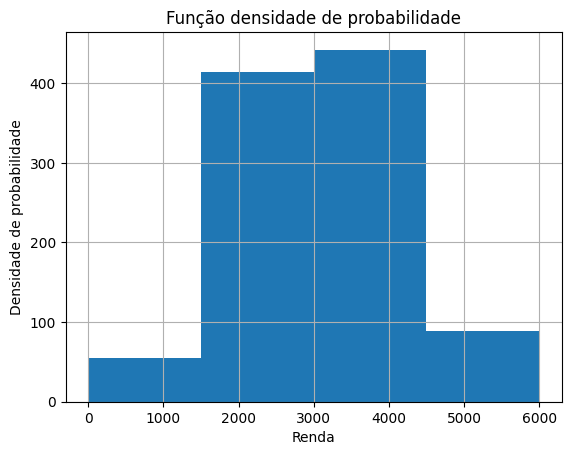

In [39]:
plt.hist(df['renda'], bins=faixas_renda)
plt.title('Função densidade de probabilidade')
plt.xlabel('Renda')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

### 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


In [ ]:
#Coluna relevante:
#Evento de interesse:
#População:
#Estatística:

In [40]:
p_pos_grad = len(df[df['escolaridade'] == 'Pós-graduação']) / len(df)
p_pos_grad

0.253

In [42]:
n = 1000000
k = 243000

In [47]:
probabilidade_pos_grad = stats.binom.pmf(k, n, p_pos_grad)
print(f'Probabilidade de 243 mil pessoas com pós-graduação dentro  da população de 1 milhão é: {probabilidade_pos_grad:}')

Probabilidade de 243 mil pessoas com pós-graduação dentro  da população de 1 milhão é: 1.1104854289794913e-119


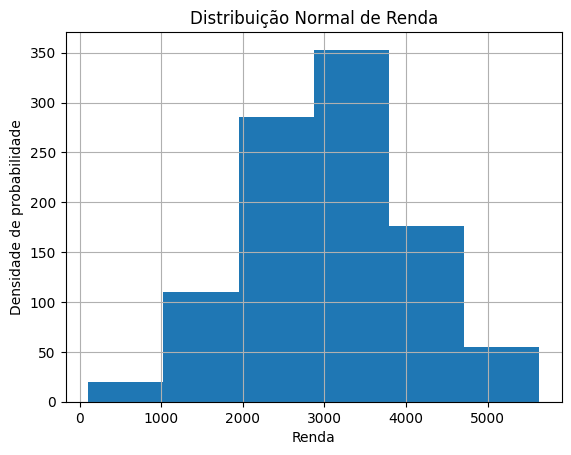

In [48]:
plt.hist(df['renda'], bins=6)
plt.title('Distribuição Normal de Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

### 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

**Usando distribuição binomial.**

In [ ]:
#Coluna relevante:
#Evento de interesse:
#População:
#Estatística:

### 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.


In [ ]:
#Coluna relevante:
#Evento de interesse:
#População:
#Estatística:

### 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


In [ ]:
#Coluna relevante:
#Evento de interesse:
#População:
#Estatística:

### 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
#Coluna relevante:
#Evento de interesse:
#População:
#Estatística:

### 10.  Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
#Coluna relevante:
#Evento de interesse:
#População:
#Estatística: